In [1]:
!pip install graphviz==0.20.3

In [2]:
import warnings
warnings.filterwarnings('ignore')

#
# Importando os dados e imprimindo a 'head'

In [3]:
import pandas as pd

uri= 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados= pd.read_csv(uri, index_col= 0)

dados.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


#
# Traduzindo as features e convertendo 'yes & no' em '1 & 0'

In [4]:
# TRADUZINDO FEATURES

mapa= {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados.rename(columns= mapa, inplace= True)

dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


In [5]:
# CONVERTENDO 'YES E NO' EM '1 E 0'

dados['vendido'].replace({'yes':1, 'no':0}, inplace= True)

dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


#
# Retrabalhando as features

### Criando a coluna 'idade_do_modelo'
#### Os anos estão com uma diferença pequena entre eles; por exemplo "2000" e "1998", há uma diferença de dois anos, mas se pensarmos 2/2000 x 100 = 0,1 , portanto o peso de dois anos é 0,1%. No caso desse projeto, ao invés de usarmos o ano do modelo, usaremos a idade desde a fabricação do carro, ou seja, quão velho ou novo é um determinado veículo. Sendo assim, criaremos a coluna idade_do_modelo. Enfim, precisaremos coletar o ano atual, por exemplo 2024, menos a data de fabricação do carro.
#### Importaremos a função datetime do módulo datetime, e solicitaremos que ele colete o ano atual.

In [6]:
from datetime import datetime

In [7]:
ano_atual= datetime.today().year # ATRIBUINDO O ANO ATUAL A UMA VARIAVEL
display(ano_atual)

# POREM, USAREI O ANO DE 2018 AO INVES DO ano_atual PARA FICAR IGUAL AOS DADOS DA AULA
dados['idade_do_modelo']= (2018 - dados['ano_do_modelo']) # CRIANDO A COLUNA idade_do_modelo

dados.head()

2024

,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,21801,2000,30941.02,1,18
1,7843,1998,40557.96,1,20
2,7109,2006,89627.50,0,12
3,26823,2015,95276.14,0,3
4,7935,2014,117384.68,1,4


### Criando a coluna km_por_ano
#### Por mais que milhas_por_ano seja uma unidade de medida válida, no Brasil estamos acostumados com quilômetros. Portanto, criaremos uma coluna nova que apresentará esses valores em quilômetros (km_por_ano). Sabendo que cada milha equivale a 1.60934km

In [8]:
dados['km_por_ano']= (dados['milhas_por_ano'] * 1.60934) # CRIANDO A COLUNA km_por_ano E CONVERTENDO MILHAS EM QUILOMETROS

dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,21801,2000,30941.02,1,18,35085.22134
1,7843,1998,40557.96,1,20,12622.05362
2,7109,2006,89627.50,0,12,11440.79806
3,26823,2015,95276.14,0,3,43167.32682
4,7935,2014,117384.68,1,4,12770.11290


### Eliminando as features inutilizadas
#### Nesse ponto, como ja realizamos as devidas conversoes e reestruturacoes, podemos deletar as colunas que não serão utilizadas (milhas_por_ano e ano_do_modelo).

In [9]:
dados.drop(columns= ['milhas_por_ano','ano_do_modelo'], axis= 1, inplace= True) # APAGANDO AS FEATURES/COLUNAS

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


#
# Com tudo pronto, vamos modelar

In [10]:
# IMPORTANDO BIBLIOTECAS

import numpy as np

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
# CLASSIFICANDO OS DADOS (X & Y)
x= dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y= dados['vendido']

In [28]:
# DEFININDO A SEED ALEATORIA DO MODELO E DO TRAIN_TEST_SPLIT (deste modo, sera desnecessario o random_state)
SEED= 5
np.random.seed(SEED) 

# CRIANDO VARIAVEIS DE TREINO E TESTE
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, stratify= y) 

# CRIANDO O MODELO, ATRIBUINDO O TREINO (model.fit()) E CRIANDO AS PREVISOES (model.predict())
model= LinearSVC()
model.fit(x_train, y_train)
previsoes= model.predict(x_test)

# REALIZANDO O TESTE DE ACURACIA
acuracia= accuracy_score(y_test, previsoes) * 100

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(x_train), len(x_test)))
print("A acurácia foi %.2f%%" % (acuracia))

Treinaremos com 7500 elementos e testaremos com 2500 elementos)
A acurácia foi 58.00%


#### Para definirmos se esse resultado é bom ou ruim, ainda precisamos de uma base comparativa, estipulando qual seria o mínimo de acerto aceitável - por exemplo, se todos os palpites fossem 0 ou 1.
#### Já fizemos esse procedimento anteriormente por meio de np.ones(), criando um array de 1 com o número de elementos que queríamos utilizar. Como esse é um processo bastante recorrente, as bibliotecas possuem ferramentas que facilitam nosso trabalho.
#### Como podemos verificar na documentação da biblioteca SKLearn, ele possui um estimador conhecido como DummyClassifier, que é basicamente o que o nome diz: um classificador "bobo".

In [13]:
from sklearn.dummy import DummyClassifier

In [14]:
#Stratified: gera previsões respeitando a distribuição de classes do conjunto de treinamento(train_test_split(test_size)), 
#mas de forma aleatória. Por isso, a acurácia pode variar a cada execução, a menos que você defina um random_state ou seed.
dummy_stratified= DummyClassifier(strategy= 'stratified')
dummy_stratified.fit(x_train, y_train)
previsoes_dummy= dummy_stratified.predict(x_test)

acuracia_dummy= accuracy_score(y_test, previsoes_dummy) * 100
print("A acurácia do dummy stratified foi %.2f%%" % (acuracia_dummy))

A acurácia do dummy stratified foi 52.44%


In [29]:
# CALCULANDO A ACURACIA A PARTIR DO PROPRIO ESTIMADOR(dummy.score())
# (estrategia: 'stratified')
dummy_stratified= DummyClassifier(strategy= 'stratified')
dummy_stratified.fit(x_train, y_train)
acuracia_dummy= dummy_stratified.score(x_test, y_test) * 100

print("A acurácia do dummy stratified foi %.2f%%" % (acuracia_dummy))

A acurácia do dummy stratified foi 52.44%


## ===================================================================

In [16]:
#Most Frequent: essa estratégia também prevê a classe mais frequente no conjunto de treinamento. Portanto, a 
#acurácia será constante.
dummy_mostfrequent= DummyClassifier(strategy= 'most_frequent')
dummy_mostfrequent.fit(x_train, y_train)
previsoes_dummy= dummy_mostfrequent.predict(x_test)

acuracia_dummy= accuracy_score(y_test, previsoes_dummy) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % (acuracia_dummy))

A acurácia do dummy mostfrequent foi 58.00%


In [17]:
# CALCULANDO A ACURACIA A PARTIR DO PROPRIO ESTIMADOR(dummy.score())
# (estrategia: 'mostfrequent')
dummy_mostfrequent= DummyClassifier(strategy= 'most_frequent')
dummy_mostfrequent.fit(x_train, y_train)
acuracia_dummy= dummy_mostfrequent.score(x_test, y_test) * 100

print("A acurácia do dummy mostfrequent foi %.2f%%" % (acuracia_dummy))

A acurácia do dummy mostfrequent foi 58.00%


### SVC e StandardScaler
#### Agora tentaremos detectar padrões não necessariamente lineares para nossos dados. Poderíamos cogitar a ideia de utilizar o SVC, mas é importante lembrar que ele (além de outros estimadores) não pode ser usado diretamente com dados em várias escalas diferentes.
#### Aprendemos no projeto anterior que precisamos reescalar nossos dados utilizando o StandardScaler() do pré-processamento.
#### Reaproveitaremos o código do projeto anterior e o revisaremos em busca de adaptações necessárias.

In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [30]:
# DEFININDO A SEED
SEED= 5
np.random.seed(SEED)

# VARIAVEIS 'RAW' (DADOS ANTES DE SEREM REESCALADOS).
raw_x_train, raw_x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, stratify= y)

# O StandardScaler(), a partir da média, desloca esses dados e divide pelo desvio padrão, criando um intervalo; uma
# nova escala.
# CRIANDO O SCALER
scaler= StandardScaler()

# TREINANDO O SCALER COM OS DADOS CRUS (RAW)
scaler.fit(raw_x_train)

# TRANSFROMANDO, TANTO O TREINO COMO O TESTE, PARA AS NOVAS ESCALAS
x_train= scaler.transform(raw_x_train)
x_test= scaler.transform(raw_x_test)

# CRIANDO E TREINANDO O MODELO
model= SVC()
model.fit(x_train, y_train)
acuracia= model.score(x_test, y_test) * 100
# model.score() substitui a necessidade de criar uma variavel de previsao, pois ao passar o x_test e o y_test, ele fara
# a previsao e, juntamente, a comparacao da previsao gerada(x_test) com os valores separados para checagem(y_test),
# retornando assim a acuracia.


print("A acurácia foi %.2f%%" % (acuracia))

A acurácia foi 77.48%


### Decision Tree
#### Com o SVC, depois de reescalarmos os dados, a acurácia tem um ganho impressionante. Porém, ainda não temos um algoritmo de classificação que nos forneça suas regras internas para que possamos entender como certas decisões são tomadas.
#### Existem algoritmos que exibem uma sequência de decisões com base nos dados fornecidos, como por exemplo um carro ter menos quilometragens rodadas e ser mais novo, e como essas decisões influenciam na classificação, em uma espécie de "árvore de decisões".
#### Não à toa, tais classificadores são chamados de decision tree classifiers. Existem vários algoritmos desse tipo, e nesse curso usaremos o DecisionTreeClassifier padrão do próprio SKLearn.

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
# A forma de utilizarmos esse classificador é bastante parecida com tudo o que fizemos até agora: vamos copiar o código 
# que criamos para o SVC(), utilizando, ao invés disso, o DecisionTreeClassifier().

# DEFININDO A SEED
SEED= 5
np.random.seed(SEED)

# VARIAVEIS 'RAW' (DADOS ANTES DE SEREM REESCALADOS).
raw_x_train, raw_x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, stratify= y)

# O StandardScaler(), a partir da média, desloca esses dados e divide pelo desvio padrão, criando um intervalo; uma
# nova escala.
# CRIANDO O SCALER
scaler= StandardScaler()

# TREINANDO O SCALER COM OS DADOS CRUS (RAW)
scaler.fit(raw_x_train)

# TRANSFROMANDO, TANTO O TREINO COMO O TESTE, PARA AS NOVAS ESCALAS
x_train= scaler.transform(raw_x_train)
x_test= scaler.transform(raw_x_test)

# CRIANDO E TREINANDO O MODELO (POREM AO INVES DO SVC, USAREMOS O DECISION TREE)
model= DecisionTreeClassifier(max_depth= 2)
model.fit(x_train, y_train)
acuracia= model.score(x_test, y_test) * 100
# model.score() substitui a necessidade de criar uma variavel de previsao, pois ao passar o x_test e o y_test, ele fara
# a previsao e, juntamente, a comparacao da previsao gerada(x_test) com os valores separados para checagem(y_test),
# retornando assim a acuracia.


print("A acurácia foi %.2f%%" % (acuracia))

A acurácia foi 76.84%


#### Nosso foco agora é compreender como as decisões estão sendo tomadas. Para tanto, usaremos outra funcionalidade do módulo sklearn.tree para exportar a visualização gráfica da árvore de decisões. O nome dessa função é export_graphviz

In [22]:
from sklearn.tree import export_graphviz

In [57]:
export_graphviz(model)
# O export_graphviz devolve, na verdade, o formato de um gráfico. Esse formato é chamado de dot, os dados dot ou, dot data,
# e ele servirá de base para a plotagem.

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[0] <= -0.196\\ngini = 0.487\\nsamples = 7500\\nvalue = [3150, 4350]"] ;\n1 [label="x[0] <= -0.986\\ngini = 0.202\\nsamples = 3248\\nvalue = [370, 2878]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 1441\\nvalue = [0, 1441]"] ;\n1 -> 2 ;\n3 [label="gini = 0.326\\nsamples = 1807\\nvalue = [370, 1437]"] ;\n1 -> 3 ;\n4 [label="x[2] <= 0.156\\ngini = 0.453\\nsamples = 4252\\nvalue = [2780, 1472]"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="gini = 0.498\\nsamples = 2649\\nvalue = [1409, 1240]"] ;\n4 -> 5 ;\n6 [label="gini = 0.248\\nsamples = 1603\\nvalue = [1371, 232]"] ;\n4 -> 6 ;\n}'

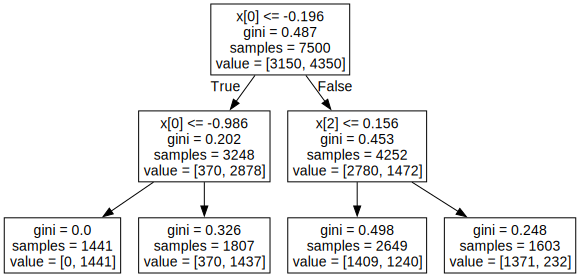

In [61]:
import graphviz
# Agora queremos plotar o dot_data, para isso precisamos de uma bilbioteca chamada graphviz, porem quando tentamos rodar
# o codigo aparecera o erro: "no module named 'graphviz'", sendo assim precisaremos importar a biblioteca atraves do 
# !pip install no inicio do arquivo. Mesmo com a biblioteca instalada, teremos outro erro na execução: "make sure the 
# Graphviz executables are on your systems", ou seja, os executáveis do graphviz não estão no nosso sistema. O Graphviz
# usa um programa na linha de comando, chamado graphviz (igual a biblioteca),  portanto precisamos instalar isso em nosso
# Windows.

# Como o grafico estará muito grande, não conseguiremos interpretá-lo com facilidade. Uma das características que podem ser 
# trabalhadas para otimizar a interpretação de uma árvore de decisões é a profundidade (max_depth): quantas condições 
# diferentes queremos que o algoritmo analise antes de fazer a classificação. Passaremos o max_depth como parametro para
# o nosso DecisionTreeClassifier().

dot_data= export_graphviz(model)
graphviz.Source(dot_data)

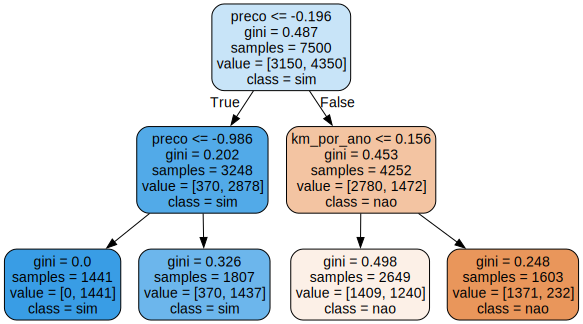

In [62]:
# Contudo, ela ainda não é muito simples de ser lida. Por exemplo, X[0] corresponde aos dados X na primeira coluna, e 
# X[1] na segunda. Ou seja, precisaremos conferir as correspondências na tabela o tempo todo, o que não é muito prático.
# Para melhorarmos esse ponto, passaremos alguns parâmetros. Por exemplo, o nome das features será x.columns. Também 
# deixaremos os quadros coloridos e com bordas arredondadas (filled = True, rounded _ True). Por fim, adicionaremos o nome
# das classes: sim, que equivale a 1; e não, que equivale a 0. Isso porque, por padrão, a árvore de decisão não exporta 
# o nome das classes automaticamente.

dot_data= export_graphviz(model, feature_names= x.columns, filled= True, rounded= True, class_names= ['nao', 'sim'])
graphviz.Source(dot_data)

In [72]:
# Agora temos uma visualização mais clara, com as cores azul e laranja indicando tipos diferentes de classificação: se um 
# preço for menor que um valor específico, o item será direcionado para a classe "sim", por exemplo, simbolizada pela cor
# azul. No caso de classificação negativa, teremos a cor laranja. O branco representa uma espécie de incerteza quanto à 
# classificação. Ainda há um ponto a ser analisado: no primeiro quadro perceberemos que o preço utilizado para definir a 
# classificação é -0.196, um valor negativo. O que isso significa? Na verdade, as features foram normalizadas, isto é, 
# fizemos a escala retirando a média e dividindo pelo desvio padrão. Dessa forma, esses não são os valores originais das
# features, e não estamos lidando com o preço real de um carro. As árvores de decisão não exigem que realizemos reescalas 
# para que tenhamos um funcionamento adequado, portanto podemos retirar o trecho de código relacionado ao StandardScaler().

SEED= 5
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, stratify= y)

# scaler= StandardScaler()
# scaler.fit(raw_x_train)
# x_train= scaler.transform(raw_x_train)
# x_test= scaler.transform(raw_x_test)

model= DecisionTreeClassifier(max_depth= 3)
model.fit(raw_x_train, y_train)
acuracia= model.score(raw_x_test, y_test) * 100

print("A acurácia foi %.2f%%" % (acuracia))

A acurácia foi 79.28%


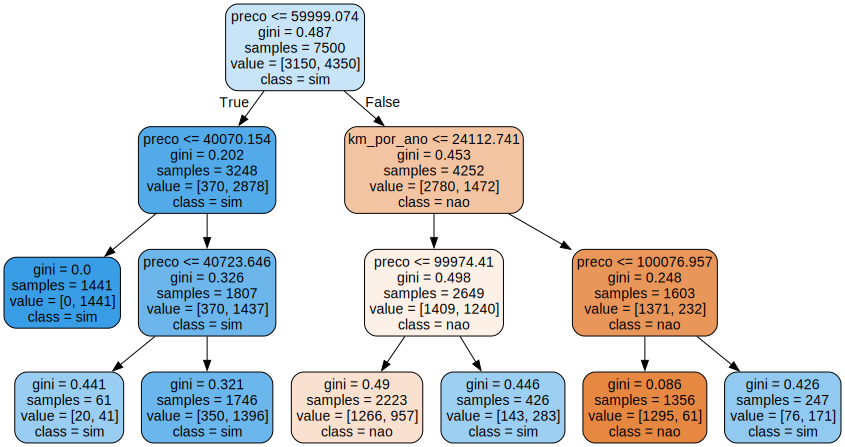

In [73]:
dot_data= export_graphviz(model, feature_names= x.columns, filled= True, rounded= True, class_names= ['nao', 'sim'])
graphviz.Source(dot_data)